<a href="https://colab.research.google.com/github/rennebarduco/AluraBook/blob/main/dataviz_comparacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
import pandas as pd

In [3]:
vendas = pd.read_csv('/content/relatorio_vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format = '%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format = '%Y-%m-%d')

vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [4]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [5]:
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[['data_pedido', 'vendas']]
df_vendas_ano['ano'] = df_vendas_ano.data_pedido.dt.year
df_vendas_ano.drop(labels='data_pedido', axis = 1, inplace = True)
df_vendas_ano = df_vendas_ano.groupby(['ano']).aggregate('sum')
df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-7-9328d6f342ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y = 'vendas', palette = cores)
<ipython-input-7-9328d6f342ea>:4: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y = 'vendas', palette = cores)


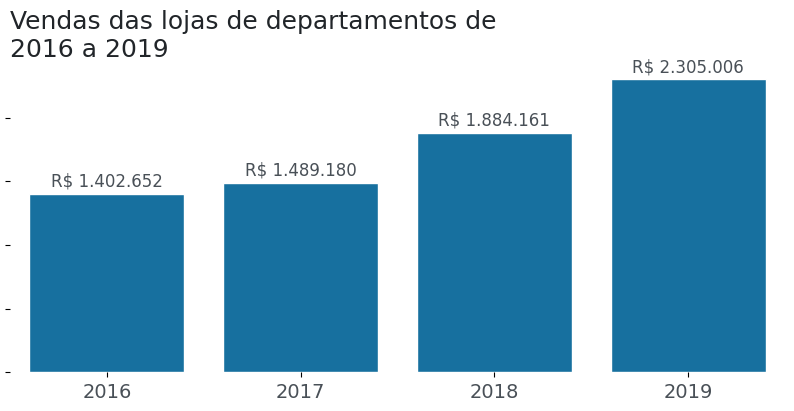

In [7]:
def grafico_vendas(cores: list=[AZUL2]):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.set_theme(style = 'white')
    ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y = 'vendas', palette = cores)
    ax.set_title('Vendas das lojas de departamentos de\n2016 a 2019', loc='left', fontsize = 18, color = CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize = 14, labelcolor = CINZA2)
    sns.despine(left = True, bottom = True)
    ax.set_yticklabels([])
    for i, valor in enumerate(df_vendas_ano['vendas']):
      qtd = f'R$ {valor:,.0f}'.replace(',', '.')
      offset = 1e5
      ax.text(i, valor + offset, qtd, color = CINZA2, fontsize = 12, ha = 'center', va = 'center')
    return ax

ax = grafico_vendas()



<ipython-input-7-9328d6f342ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y = 'vendas', palette = cores)


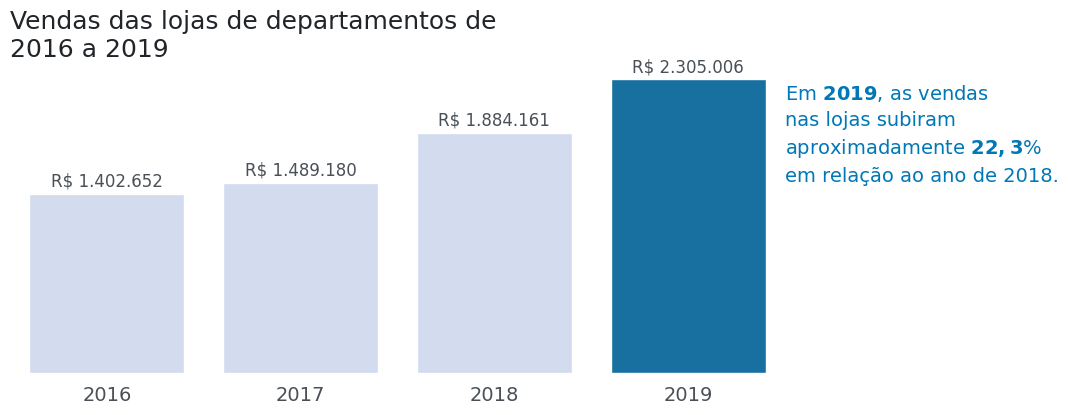

In [8]:
cores = []
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano, 'vendas'] == df_vendas_ano.vendas.max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

ax = grafico_vendas(cores)

# Anotando uma conclusão no gráfico
ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

In [9]:
top_lucro = vendas.copy()
top_lucro = top_lucro[['tipo_produto', 'lucro']]
top_lucro

top_lucro = top_lucro.groupby(['tipo_produto']).agg('sum').sort_values('lucro', ascending = False)
top_7 = top_lucro[:7]

top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


<ipython-input-10-2dd994e1fafe>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x = 'lucro', y = top_7.index, palette = cores)


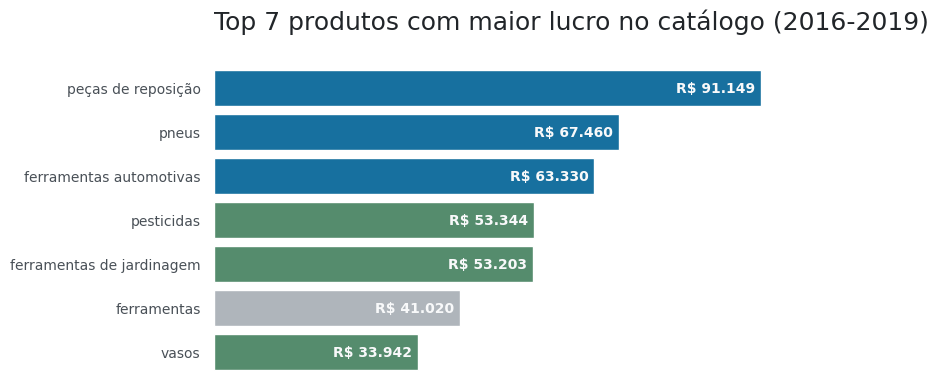

In [10]:
def grafico_top_7():
  fig, ax = plt.subplots(figsize = (10, 4))
  fig.subplots_adjust(right = 0.7)
  sns.set_theme(style = 'white')

  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  ax = sns.barplot(data = top_7, x = 'lucro', y = top_7.index, palette = cores)

    # Personalizando o gráfico
  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)

    # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(top_7['lucro']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 1e3  # offset de 1.000
    ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

  return ax


ax = grafico_top_7()




In [11]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax = None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

<ipython-input-10-2dd994e1fafe>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x = 'lucro', y = top_7.index, palette = cores)


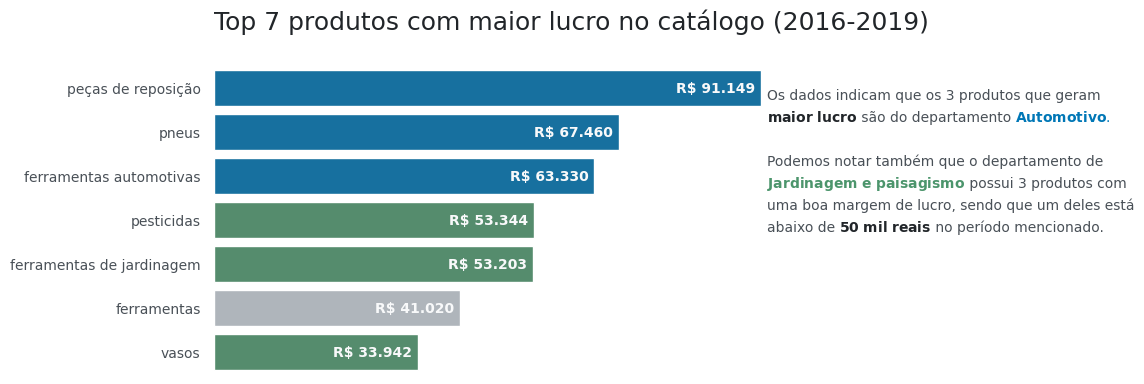

In [12]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                       			 # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                       	           # linha 1                         		 # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                                     # linha 3
     [CINZA2],                       	          # linha 4
     [VERDE1, CINZA2],                   # linha 5
     [CINZA2],                                    # linha 6
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22,				 # espaçamento
    ax=ax,				 # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()

In [13]:
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg [['data_pedido', 'regiao', 'vendas']]

df_vendas_reg['ano'] = df_vendas_reg.data_pedido.dt.year
df_vendas_reg.drop(labels = 'data_pedido', axis = 1, inplace = True)

df_vendas_reg

,regiao,vendas,ano
0,Sudeste,890.66,2018
1,Sudeste,2488.59,2018
2,Sudeste,49.72,2018
3,Sul,3255.75,2017
4,Sul,76.04,2017
...,...,...,...
8935,Sudeste,123.22,2018
8936,Nordeste,271.97,2019
8937,Nordeste,700.75,2019
8938,Nordeste,85.83,2016


In [14]:
vendas_reg = pd.crosstab(index = df_vendas_reg.ano, columns = df_vendas_reg.regiao, values = df_vendas_reg.vendas, aggfunc = 'sum')
vendas_reg = vendas_reg[['Sudeste', 'Nordeste', 'Centro-Oeste', 'Norte', 'Sul']]
vendas_reg

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
ano,,,,,
2016,739602.18,378521.83,121653.63,101580.57,61294.12
2017,803005.61,320804.28,149215.00,124164.47,91990.16
2018,1033836.21,401365.77,208068.71,108710.09,132180.63
2019,1146764.08,600738.87,257781.18,170311.34,129410.82


<Axes: title={'left': 'Vendas das lojas de departamentos por região\nde 2016 a 2019'}>

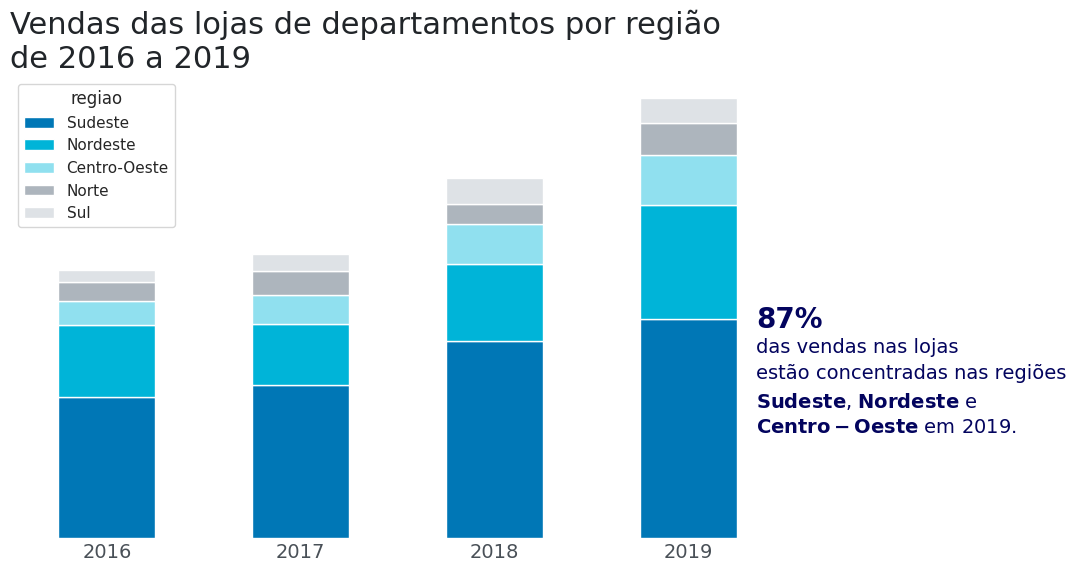

In [15]:
def grafico_vendas_regiao():
  cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]
  ax = vendas_reg.plot(kind = 'bar', stacked = True, figsize = (10,6), color = cores)
  # Personalizando o gráfico
  ax.set_title('Vendas das lojas de departamentos por região\nde 2016 a 2019', loc='left', fontsize=22, color = CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
  ax.set_frame_on(False)

  ax.tick_params(axis = 'both', which = 'both', length = 0)

  # Anotando uma conclusão no gráfico
  ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
  ax.text(3.35, 5.5e5,
        'das vendas nas lojas\n'
        'estão concentradas nas regiões\n'
        '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
        '$\\bf{Centro-Oeste}$ em 2019.',
        fontsize=14,
        linespacing=1.45,
        color=AZUL1)

  return ax

grafico_vendas_regiao()

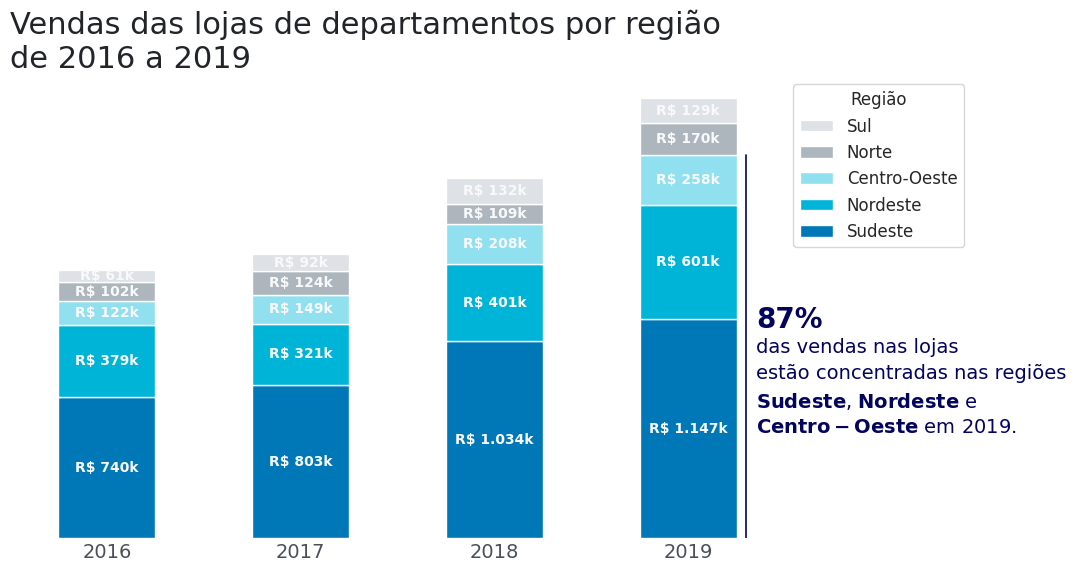

In [16]:
ax = grafico_vendas_regiao()
ax.legend(bbox_to_anchor = (1,1), reverse = True, title = 'Região', title_fontsize = 12, fontsize = 12)

# Adicionando os valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.0f}k'.replace(',',".") for valor in container]
  ax.bar_label(container, label_type="center", labels = labels, size = 10, color = CINZA5, fontweight = "bold")

ax.axvline(x = 3.3, ymin = 0, ymax = 0.83, color = AZUL1, linewidth = 1.2)

fig = ax.get_figure()



In [17]:
df_envio = vendas.copy()
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

df_envio_seg = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente).sort_values('B2B')

df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Envio rápido,676,673
Econômica,829,906
Entrega padrão,2552,2809


In [18]:
df_envio_normalizado = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente, normalize = 'index')

df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,0.418182,0.581818
Econômica,0.477810,0.522190
Entrega padrão,0.476031,0.523969
Envio rápido,0.501112,0.498888


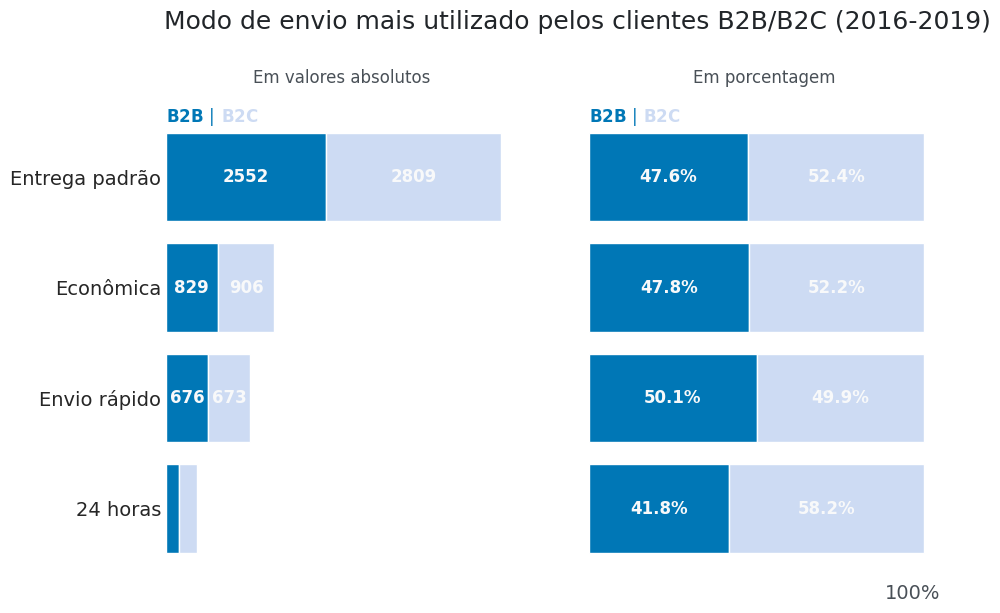

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (10,6), sharey = True)
cores = [AZUL2, AZUL5]

axs[0].barh(df_envio_seg.index, df_envio_seg["B2B"], color = cores[0])
axs[0].barh(df_envio_seg.index, df_envio_seg["B2C"], left = df_envio_seg['B2B'], color = cores[1])
axs[0].set_title('Em valores absolutos\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize = 14, color = CINZA2)
axs[0].set_frame_on(False)

axs[0].tick_params(axis = 'both', which = 'both', length = 0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax = axs[0], fontsize = 12)

axs[1].barh(df_envio_normalizado.index, df_envio_normalizado['B2B'], color = cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado['B2C'], left = df_envio_normalizado['B2B'], color = cores[1])
axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc = 'right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].yaxis.set_tick_params(labelsize = 14, color = CINZA2)
axs[1].set_frame_on(False)

axs[1].tick_params(axis = 'both', which = 'both', length = 0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax = axs[1], fontsize = 12)

fig.suptitle('Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n',
             fontsize = 18, color = CINZA1, ha = 'right', x = 0.95, y = 1.05)

for container in axs[0].containers:
  labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
  axs[0].bar_label(container, label_type = 'center', labels = labels, size = 12, color = CINZA5, fontweight = 'bold')

for container in axs[1].containers:
  labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
  axs[1].bar_label(container, label_type = 'center', labels = labels, size = 12, color = CINZA5, fontweight = 'bold')

fig.show()




In [20]:
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
vendas_co = vendas.copy()
vendas_co = vendas_co[['data_pedido','regiao', 'estado', 'vendas']]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
vendas_co['ano'] = vendas_co.data_pedido.dt.year

# Selecionando apenas os dados do Centro-Oeste dos anos de 2017 e 2018 e removendo as colunas de data_pedido e região
vendas_co = vendas_co.query("regiao == 'Centro-Oeste' and (ano == 2017 or ano == 2018)")
vendas_co.drop(labels = ["data_pedido","regiao"], axis = 1, inplace = True)

vendas_co

,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [21]:
vendas_co_ano = pd.crosstab(index = vendas_co.ano, columns = vendas_co.estado, values = vendas_co.vendas, aggfunc = 'sum')
vendas_co_ano

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


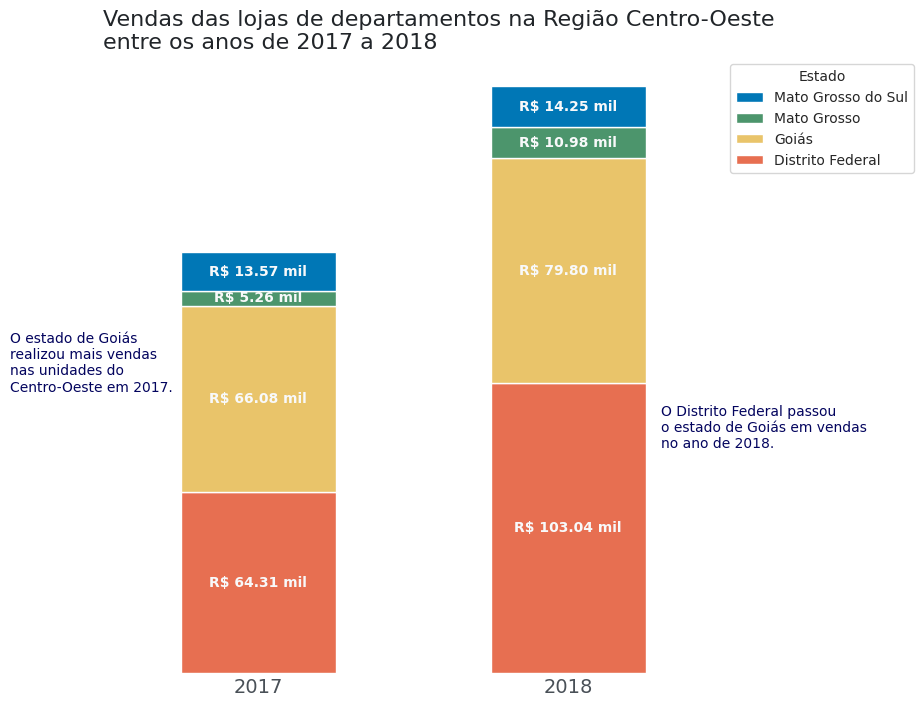

In [22]:
# Definindo as cores do gráfico
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

# Gerando o gráfico de colunas empilhadas
ax = vendas_co_ano.plot(kind="bar", stacked=True, figsize=(8,8), color = cores)

# Personalizando o gráfico
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018',
             loc='left', fontsize=16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis="both", which ="both", length=0)

# Anotando uma conclusão no gráfico
ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1,1), reverse = True, title= "Estado", title_fontsize = 10, fontsize = 10)

# Adicionando os valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(",",".") for valor in container]
  ax.bar_label(container, label_type="center", labels = labels, size = 10, color = CINZA5, fontweight = "bold")

fig = ax.get_figure()

In [23]:
# Criando um df com os dados desejados
df_depart = vendas.copy()
df_depart = df_depart[['departamento','modo_envio']]

## Criando uma tabela cruzada (crosstab) com a frequência de modos de envio por departamento
df_depart = pd.crosstab(index = df_depart.departamento, columns = df_depart.modo_envio, normalize = "index")

df_depart

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


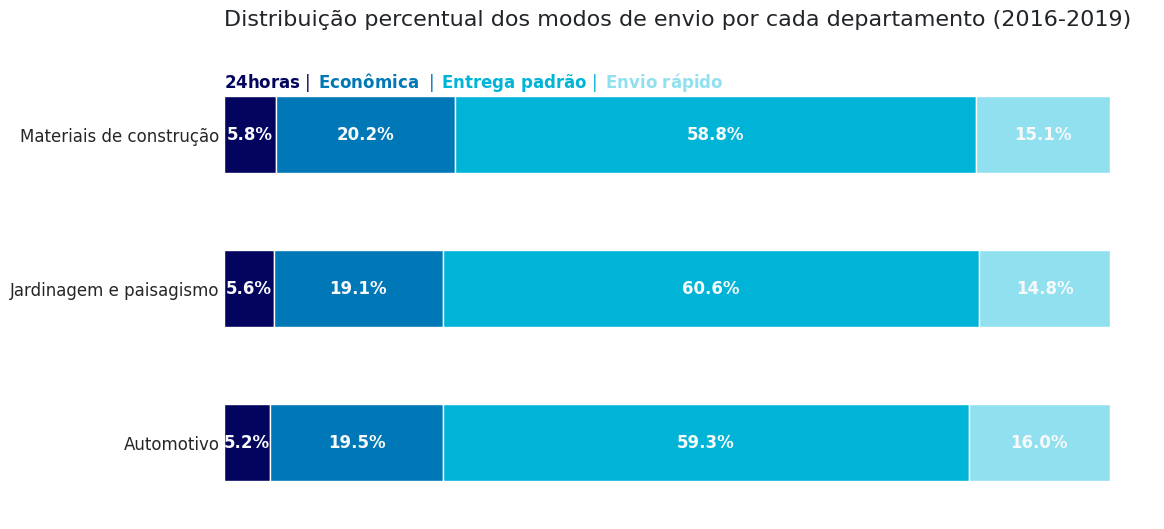

In [24]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico de barras empilhadas
ax = df_depart.plot(kind="barh", stacked=True, figsize=(12,6), color = cores, legend = None)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n",
             fontsize=16, loc="left", color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

# Valores das barras
for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig = ax.get_figure()

In [25]:
df_sp = vendas.copy()
df_sp = df_sp.query('estado == "São Paulo"')[['data_pedido', 'vendas']]

df_sp.set_index('data_pedido', inplace = True)
df_sp	= df_sp.resample('Q').agg('sum')
df_sp['vendas'] = round(df_sp['vendas'] / 1e3, 2)
df_sp = df_sp.reset_index()

df_sp

,data_pedido,vendas
0,2016-03-31,41.87
1,2016-06-30,43.79
2,2016-09-30,154.91
3,2016-12-31,144.82
4,2017-03-31,36.13
5,2017-06-30,76.86
6,2017-09-30,129.76
7,2017-12-31,197.94
8,2018-03-31,44.26
9,2018-06-30,109.64


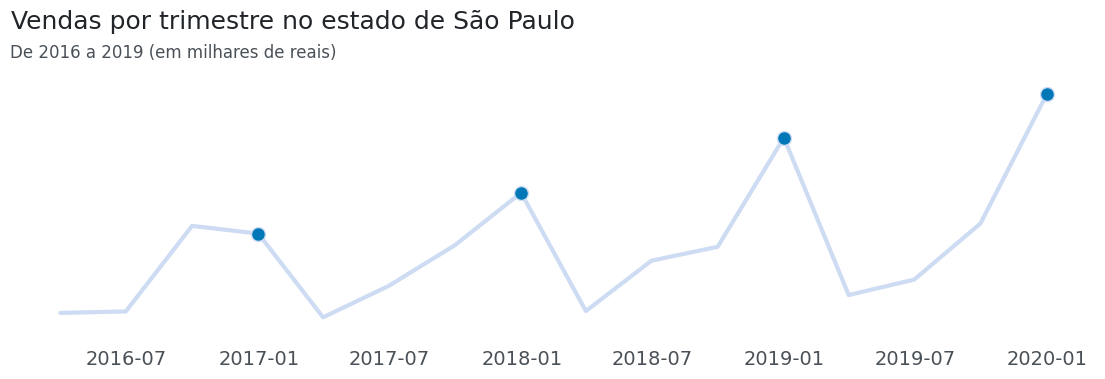

In [26]:
def grafico_vendas_sp_tri():

    import matplotlib.pyplot as plt


    fig, ax = plt.subplots(figsize=(14,4))


    pontos_a_marcar = [True if mes == 12 else False for mes in df_sp["data_pedido"].dt.month]

    ax.plot(df_sp["data_pedido"], df_sp["vendas"], lw = 3, color = AZUL5, marker = "o", markersize = 10, markerfacecolor = AZUL2, markevery =  pontos_a_marcar)

    ax.set_title('Vendas por trimestre no estado de São Paulo', fontsize = 18, color = CINZA1, loc='left')
    ax.text(0.3, 0.95, "De 2016 a 2019 (em milhares de reais)", transform=ax.transAxes, color= CINZA2, fontsize=12, ha='right', va='center')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.set_frame_on(False)
    ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2)

    ax.tick_params(axis='both', which='both', length=0)

    plt.ylim(0, 400)

    return ax

ax = grafico_vendas_sp_tri()

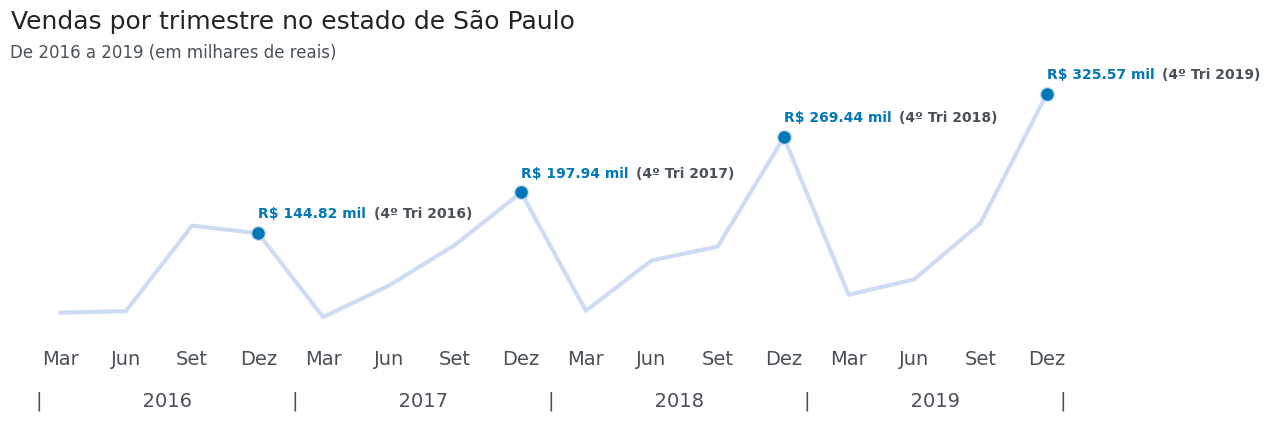

In [27]:
import matplotlib.dates as mdates

ax = grafico_vendas_sp_tri()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
x_labels = ['Mar', 'Jun', 'Set', 'Dez'] * 4
ax.set_xticks(df_sp.data_pedido)
ax.set_xticklabels(x_labels, ha = 'center')

texto = [16*" " + str(i) + 16*" " for i in range(2016, 2020)]
ax.text(ax.get_xbound()[0] + 35, - 80, f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|', fontsize=14, color=CINZA2)
ano = 0
for i in range(3, len(df_sp["vendas"]), 4):
  ax.text(x = ax.get_xticks()[i], y = df_sp["vendas"][i] + 20, s = f"R$ {df_sp['vendas'][i]} mil", color = AZUL2, weight = "bold", fontsize = 10)
  ax.text(x = ax.get_xticks()[i] + 160, y = df_sp["vendas"][i] + 20, s = f"(4º Tri {2016 + ano})", color = CINZA2, weight = "bold", fontsize = 10)
  ano +=1


fig = ax.get_figure()

In [28]:
df_regiao = vendas.copy()
df_regiao = df_regiao[['regiao', 'data_pedido', 'vendas']]

df_regiao = pd.crosstab(index = df_regiao.data_pedido, columns = df_regiao.regiao, values = df_regiao.vendas, aggfunc = 'sum')
df_regiao = df_regiao [['Sudeste', 'Nordeste', 'Centro-Oeste', 'Norte', 'Sul']]
df_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-01-04,55.92,NaN,NaN,NaN,NaN
2016-01-05,979.42,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,66.42,NaN,NaN
2016-01-07,14940.66,43.44,NaN,NaN,NaN
2016-01-08,296.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,2552.32,152.15,NaN,10.64
2019-12-28,603.96,NaN,NaN,NaN,NaN
2019-12-29,677.65,4079.73,NaN,456.94,NaN


In [29]:
df_regiao = df_regiao.resample('Q').agg('sum')
df_regiao = round(df_regiao/1e3, 2)
df_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-03-31,70.18,41.73,16.80,9.31,1.51
2016-06-30,122.72,87.41,30.83,24.68,10.62
2016-09-30,226.43,158.12,39.61,21.94,11.97
2016-12-31,320.27,91.27,34.41,45.65,37.19
2017-03-31,127.89,61.58,5.90,35.25,4.75
2017-06-30,161.54,54.93,16.96,13.35,21.23
2017-09-30,206.29,91.60,48.82,48.71,21.68
2017-12-31,307.28,112.69,77.54,26.86,44.34
2018-03-31,120.56,92.40,29.30,39.03,6.95


In [30]:
import plotly.express as px

fig = px.line(df_regiao, x = df_regiao.index, y = df_regiao.columns, markers = True, labels = {'regiao': 'Região'},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1, VERDE1, CINZA3])
fig.update_layout(width = 1300, height = 600, font_family = 'DejaVu Sans', font_size = 15, font_color = CINZA2,
                  title_font_color = CINZA1, title_font_size = 24, title_text = 'Faturamento da loja de departamentos por trimestre'
                  + '<br><sup size = 1 style = "color:#555655">De 2016 a 2019</sup>',
                  xaxis_title = '', yaxis_title = '', plot_bgcolor = CINZA5)
fig.update_yaxes(tickprefix = 'R$ ', ticksuffix = ' mil')
labels = ['T1<br>2016','T2<br>2016','T3<br>2016','T4<br>2016',
          'T1<br>2017','T2<br>2017','T3<br>2017','T4<br>2017',
          'T1<br>2018','T2<br>2018','T3<br>2018','T4<br>2018',
          'T1<br>2019','T2<br>2019','T3<br>2018','T4<br>2019']
fig.update_xaxes(ticktext = labels, tickvals = df_regiao.index)

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [31]:
# Dados ao passar o mouse
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Faturamento:</b> %{y}")
# fig.update_layout(hovermode="closest")    # para exibir apenas do dado que passamos o mouse
# fig.update_layout(hovermode="x")          # para exibir todos os dados do período em cada linha
# fig.update_layout(hovermode="x unified")  # para exibir o resumo de todos os dados no período

fig.show()

In [32]:
vol_amaciante = pd.read_csv('/content/volume_amaciante.csv')
vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


In [33]:
vol_amaciante.describe()

,Volume
count,1000.00000
mean,999.98970
std,0.48553
min,998.30000
25%,999.70000
50%,1000.00000
75%,1000.30000
max,1001.50000


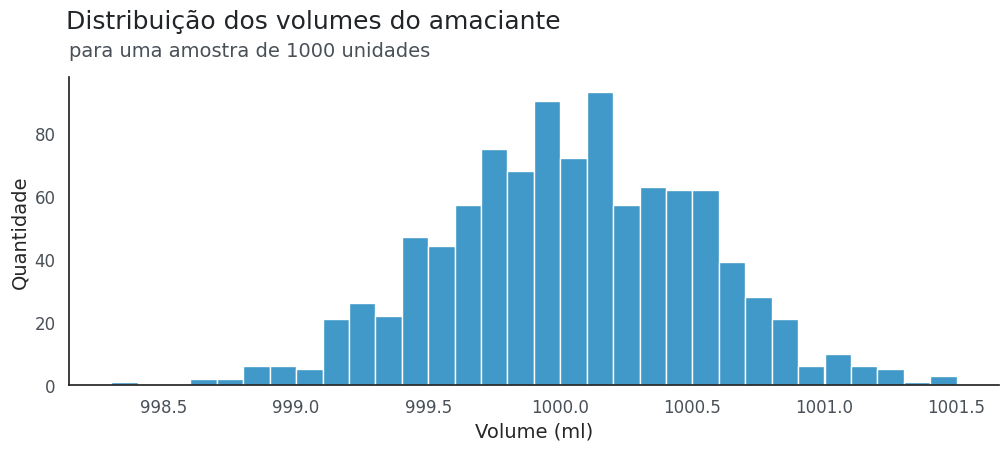

In [34]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12, 4))
sns.set_theme(style = 'white')

ax = sns.histplot(data = vol_amaciante, x = 'Volume', binwidth = 0.1, color = AZUL2)
#ax = sns.histplot(data = vol_amaciante, x = 'Volume', bins = 20, color = AZUL2)

# Personalizando o gráfico
plt.suptitle('Distribuição dos volumes do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.535, y = 1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Volume (ml)', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()


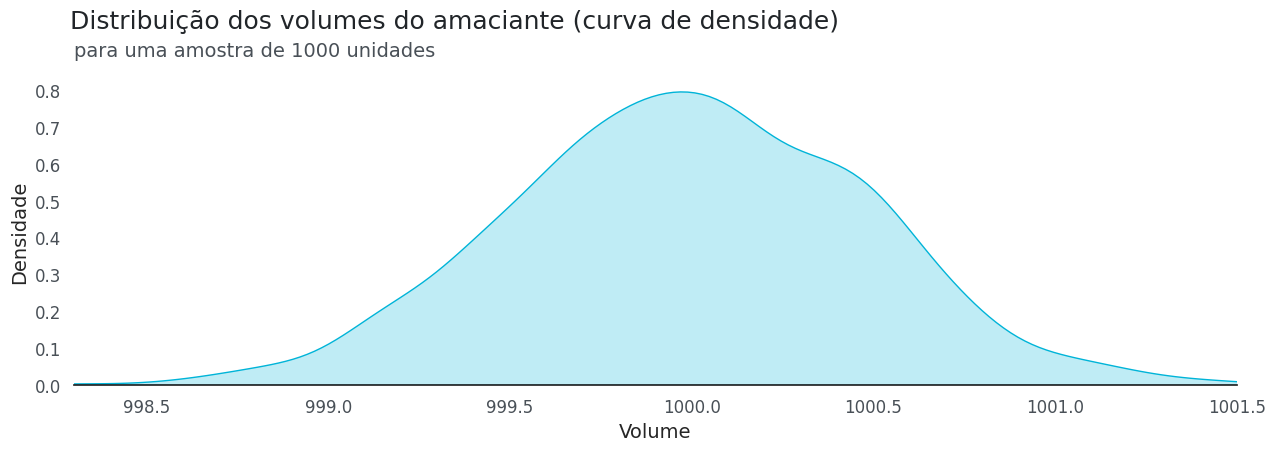

In [35]:
def grafico_densidade():
  fig, ax = plt.subplots(figsize = (15, 4))
  sns.set_theme(style = 'white')
  ax = sns.kdeplot(data = vol_amaciante, x = 'Volume', color = AZUL3, fill = True)
    # Personalizando o gráfico
  plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)', size=18, color=CINZA1, ha = 'right', x = 0.635, y = 1.05)
  plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
  ax.set_xlabel('Volume', fontsize = 14)
  ax.set_ylabel('Densidade', fontsize = 14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.set_xlim(vol_amaciante.Volume.min(), vol_amaciante.Volume.max())
  sns.despine(left = True)

  return ax


ax = grafico_densidade()

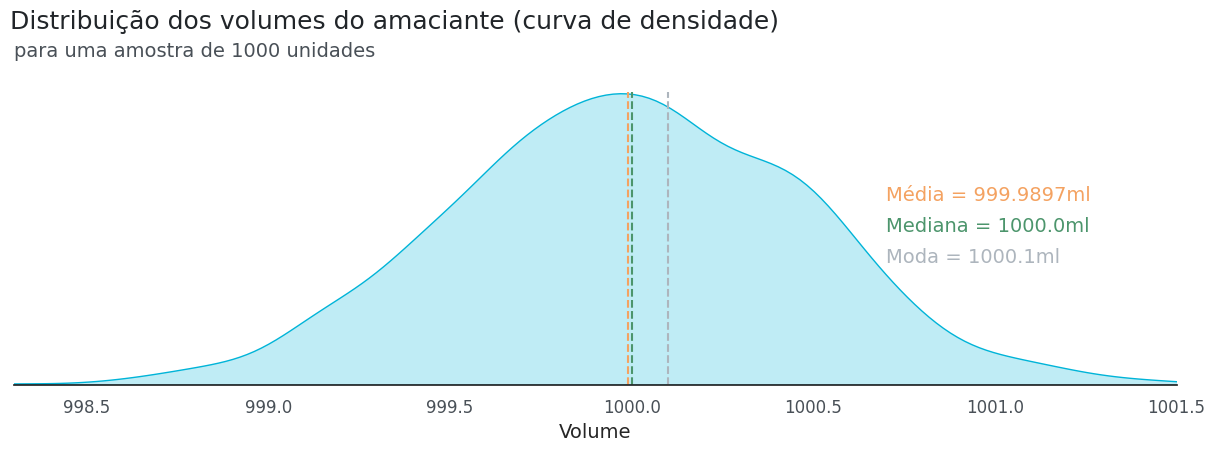

In [36]:
ax = grafico_densidade()
ax.set_ylabel('')
ax.set_yticklabels([])

estat = vol_amaciante.Volume.mean(), vol_amaciante.Volume.median(), vol_amaciante.Volume.mode()[0]
desc = ['Média', 'Mediana', 'Moda']
cores = [LARANJA1, VERDE1, CINZA3]

ax.vlines(x = estat, ymin = 0, ymax = 0.8, colors = cores, linestyles = '--')

for i in range(len(estat)):
  ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]}ml', fontsize = 14, color = cores[i], transform = ax.transAxes)

fig = ax.get_figure()



/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1477: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



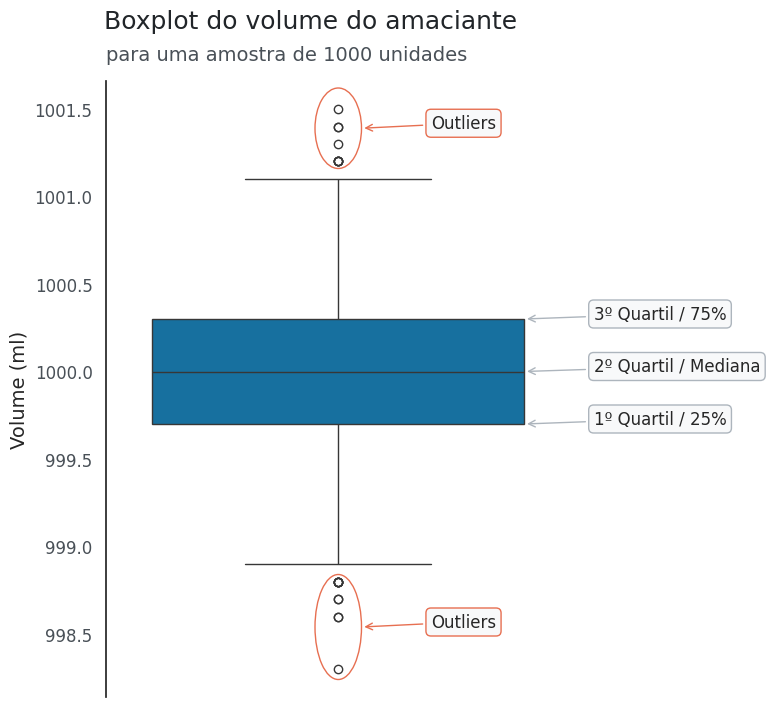

In [37]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize = (6, 8))

ax = sns.boxplot(data = vol_amaciante, y = 'Volume', orient = 'v', color = AZUL2)
## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)
# Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.27), width = 0.1, height = 0.46, color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)
# Adicionando a explicação dos elementos de um boxplot
ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),         # caixa de texto
            xytext=(50, 0), textcoords='offset points',                   # posição do texto
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))            # propriedades da seta

ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))
ax.annotate("1º Quartil / 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("2º Quartil / Mediana", xy=(0.4, vol_amaciante.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("3º Quartil / 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

plt.show()

In [38]:
df_medidas = pd.read_csv('/content/medidas_sabao_em_po.csv')
df_medidas.sample(5)

,comprimento,altura,largura,amostra
945,20.14,14.85,4.98,E
224,20.00,15.00,4.97,B
623,20.02,14.99,4.94,D
213,20.06,14.94,5.05,B
12,19.95,15.05,5.03,A


In [39]:
df_medidas.describe()

,comprimento,altura,largura
count,1000.000000,1000.00000,1000.000000
mean,20.025740,14.97233,5.000050
std,0.059189,0.06294,0.051081
min,19.910000,14.69000,4.840000
25%,19.980000,14.93000,4.970000
50%,20.020000,14.99000,5.000000
75%,20.060000,15.02000,5.030000
max,20.250000,15.09000,5.190000


<ipython-input-40-b96576148713>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




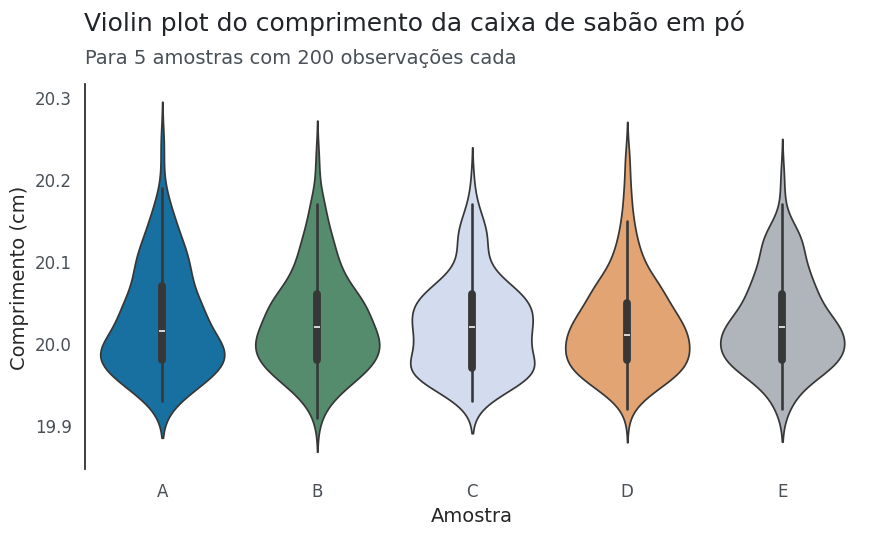

In [40]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.set_theme(style = 'whitegrid')

ax = sns.violinplot(data = df_medidas, x = 'amostra', y = 'comprimento', palette = [AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])

### Personalizando o gráfico
plt.suptitle('Violin plot do comprimento da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.785, y = 1.03)
plt.title('Para 5 amostras com 200 observações cada', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Amostra',  fontsize = 14)
ax.set_ylabel('Comprimento (cm)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

plt.show()


In [41]:
df_a = df_medidas.query('amostra == "A"')[['comprimento', 'altura']]
df_a.head()

,comprimento,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01


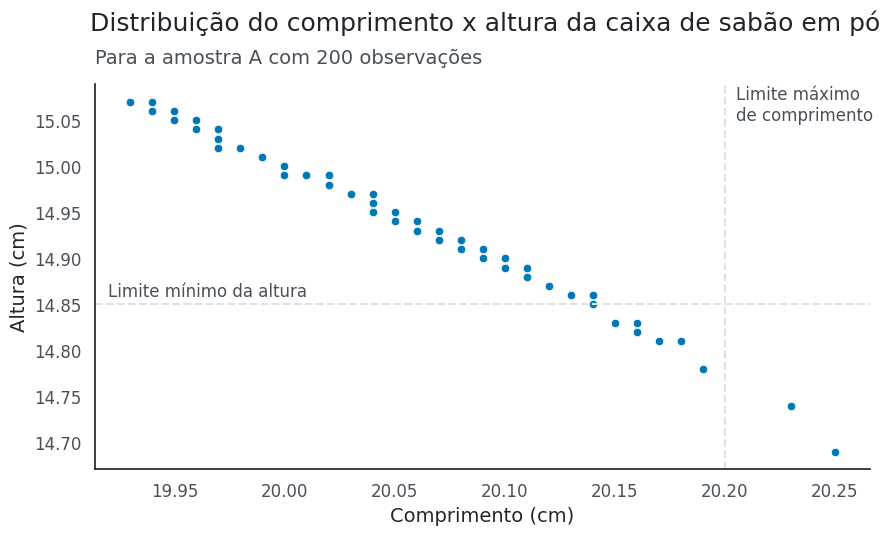

In [43]:
# Gerando a função que cria o gráfico de dispersão

def grafico_dispersao(map_cores: list=[AZUL2], pct: float=0.01):
  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,5))
  sns.set_theme(style="white")

# Gerando o gráfico de dispersão
  ax = sns.scatterplot(data=df_a, x="comprimento", y="altura", color=map_cores)

   ## Personalizando o gráfico
  plt.suptitle('Distribuição do comprimento x altura da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.91, y = 1.03)
  plt.title('Para a amostra A com 200 observações', fontsize=14, color=CINZA2, pad = 15, loc = "left")
  ax.set_xlabel('Comprimento (cm)',  fontsize = 14)
  ax.set_ylabel('Altura (cm)', fontsize = 14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  sns.despine()

   # Desenhando a linha horizontal com o límite mínimo de altura desejado
  ax.text(19.92, 14.855, 'Limite mínimo da altura', fontsize=12, color = CINZA2, va = "bottom")
  plt.axhline(y = 15 * (1 - pct), color = CINZA4, linestyle='--')

  # Desenhando a linha vertical com o límite mínimo de comprimento desejado
  ax.text(20.205, 15.05, 'Limite máximo\nde comprimento', fontsize=12, color = CINZA2, ha="left")
  plt.axvline(x = 20 * (1 + pct), color = CINZA4, linestyle='--')

  return ax

ax = grafico_dispersao()

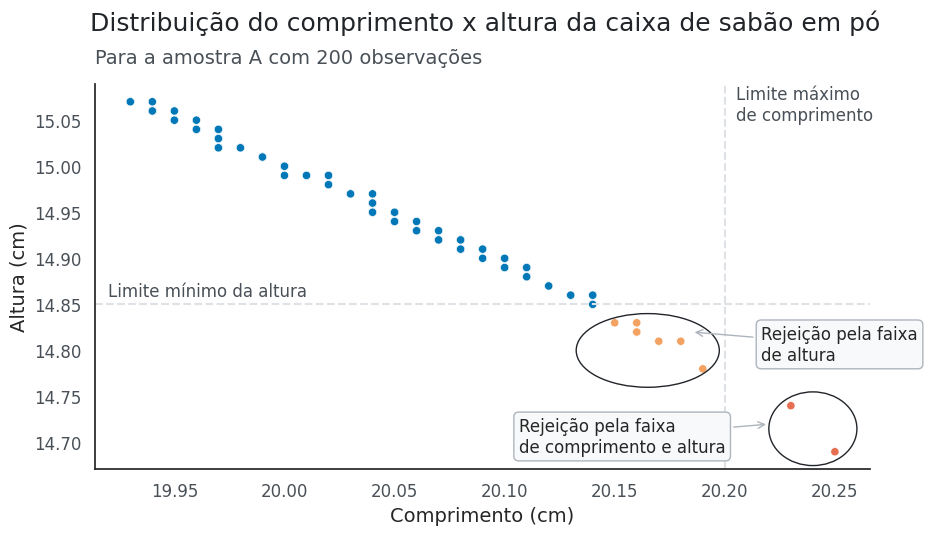

In [46]:
import numpy as np

cores = [VERMELHO1, LARANJA1, AZUL2]

pct = 0.01
rejeita_comp = [True if (c > 20*(1 + pct) or c < 20*(1 - pct)) else False for c in df_a['comprimento']]
rejeita_alt = [True if (c > 15*(1 + pct) or c < 15*(1 - pct)) else False for c in df_a['altura']]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_alt, cores[1], cores[2]))

ax = grafico_dispersao(map_cores, pct)

# Selecionando as áreas de rejeição
rej_comp = Ellipse((20.165, 14.80), width = 0.065, height = 0.08, color=CINZA1, fill=False)
rej_alt = Ellipse((20.24, 14.715), width = 0.04, height = 0.08, color=CINZA1, fill=False)
ax.add_patch(rej_comp)
ax.add_patch(rej_alt)

ax.annotate("Rejeição pela faixa\nde altura", xy=(20.185, 14.82), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("Rejeição pela faixa\nde comprimento e altura", xy=(20.22, 14.72), xycoords='data',
             bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
             xytext=(-180, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color=CINZA3))

fig = ax.get_figure()